In [1]:
import numpy as np
import pandas as pd

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')
plt.rcParams['font.sans-serif'] ='SimHei' 
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False
# plt.style.use('ggplot')

%matplotlib inline

In [17]:
'''
    读取数据
'''
OrderedDict=pd.read_excel('./data/12月份进客成交数据.xlsx',sheet_name=['进客','成交','端口费用'])
user=OrderedDict['进客']
order=OrderedDict['成交']
channel=OrderedDict['端口费用']

In [452]:
channel=channel.replace({58:'58同城','赶集月度':'赶集网','赶集季度':'赶集网'})

In [24]:
'''
    观察数据
'''
# user.info()
# order.info()
# channel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 5 columns):
经纪人姓名    298 non-null object
区        298 non-null object
组        298 non-null object
端口       298 non-null object
费用       298 non-null int64
dtypes: int64(1), object(4)
memory usage: 11.7+ KB


In [32]:
'''
    1.缺失值
    2.重复数据
    3.字段类型转换
'''
user.isna().sum()# 各字段缺失值的数量
user.isna().any()# 各字段是否存在缺失值
user.isna().all()# 各字段是否都为缺失值
user.isna().all(axis=1).sum()# 数据都为空记录的数量

0

In [35]:
user.columns[user.isna().any()]

Index(['门店', '业务组', '求租商圈', '求租类型', '求租等级', '最后跟进日', '出租合同提交日期', '出租合同承租起算日',
       '出租合同', '首次跟进时间', '求租价格', '最后一次跟进部门', '最后一次跟进人'],
      dtype='object')

In [111]:
'''
    数据中包含缺失值的列有哪些?
    数据中缺失值的占比个数?
'''
def missing_info(data):
    missing_col=data.columns[data.isna().any()].tolist()
    print("字段总数为{},缺失列个数为{},占比{:.2%}\n".format(len(data.columns),len(missing_col),len(missing_col)/len(data.columns)))
    for col in missing_col:
        print("{}:缺失值个数为{},缺失值占比为{:.2%}".format(col,data[col].isna().sum(),data[col].isna().mean()))
# missing_info(user)
missing_info(order)

字段总数为76,缺失列个数为21,占比27.63%

业务组:缺失值个数为1,缺失值占比为0.02%
委托装修起算日:缺失值个数为2860,缺失值占比为67.87%
委托装修截止日:缺失值个数为2859,缺失值占比为67.85%
委托免租起算日:缺失值个数为270,缺失值占比为6.41%
委托免租截止日:缺失值个数为270,缺失值占比为6.41%
装修交房日期:缺失值个数为2624,缺失值占比为62.27%
上一份出租合同实际到期日:缺失值个数为1700,缺失值占比为40.34%
业绩:缺失值个数为58,缺失值占比为1.38%
管家服务费:缺失值个数为4214,缺失值占比为100.00%
违约金收入:缺失值个数为4198,缺失值占比为99.62%
装修成本:缺失值个数为72,缺失值占比为1.71%
资金成本:缺失值个数为72,缺失值占比为1.71%
违约金成本:缺失值个数为4213,缺失值占比为99.98%
报销总费用:缺失值个数为3753,缺失值占比为89.06%
服务管家:缺失值个数为440,缺失值占比为10.44%
楼盘等级:缺失值个数为3412,缺失值占比为80.97%
成本占比:缺失值个数为1208,缺失值占比为28.67%
置信度:缺失值个数为1824,缺失值占比为43.28%
下一份委托合同起算日:缺失值个数为4192,缺失值占比为99.48%
下一份委托合同实际到期日:缺失值个数为4192,缺失值占比为99.48%
ocr扫描或相册获取:缺失值个数为4214,缺失值占比为100.00%


In [57]:
print("重复数据的记录数:",user.duplicated().sum())
print("重复数据的记录数:",order.duplicated().sum())

重复数据的记录数: 0
重复数据的记录数: 0


In [60]:
user.duplicated(subset=['客户编号']).sum()

0

In [67]:
order.duplicated(subset=['出租合同号']).sum()

0

In [69]:
user.columns

Index(['城市', '城区', '业务区', '门店', '业务组', '归属部门', '归属人', '创建时间', '客户编号', '姓名',
       '求租城区', '求租商圈', '求租类型', '客户来源', '客户来源.1', '求租等级', '录入部门', '录入人',
       '推荐房源量', '看房次数', '服务次数', '看房套数', '最后跟进日', '响应时长分', '是否带看', '创建渠道',
       '提交渠道', '手机号码', '出租合同提交日期', '出租合同承租起算日', '出租合同数量', '出租合同', '一带多看',
       '首次跟进时间', '求租价格', 'app看房次数', '最后一次跟进部门', '最后一次跟进人'],
      dtype='object')

In [84]:
'''
    字段类型转换
'''
if user['创建时间'].dtype=='object':
    user['创建时间']=pd.to_datetime(user['创建时间'])
if user['首次跟进时间'].dtype=='object':
    user['首次跟进时间']=pd.to_datetime(user['首次跟进时间'])
if user['最后跟进日'].dtype=='object':
    user['最后跟进日']=pd.to_datetime(user['最后跟进日'])

In [91]:
if order['出租合同提交时间'].dtype=='object':
    order['出租合同提交时间']=pd.to_datetime(order['出租合同提交时间'])

In [ ]:
'''
    房主--(收房/委托)-->公司--(装修/改造)-->租客
'''

In [ ]:
'''
    销售额、利润、订单数
'''

In [96]:
order['城市'].unique()

array(['杭州市', '上海市', '南京市', '苏州市'], dtype=object)

In [102]:
'数据筛选:上海 新签 有效'
order_sh=order.query('城市=="上海市" and 合同类型=="新签" and 出租合同状态=="有效"').copy()

In [130]:
print("12月份上海市新签有效订单数:{}单".format(order_sh['出租合同号'].count(),sep=""))
print("12月份上海市新签有效订单的总销售额:{}元".format(int(order_sh['出租合同首付月租金'].sum()*12),sep=""))
print("12月份上海市新签有效订单的总业绩:{}元".format(int(order_sh['业绩'].sum()),sep=""))

12月份上海市新签有效订单数:501单
12月份上海市新签有效订单的总销售额:12239402元
12月份上海市新签有效订单的总业绩:667030元


In [133]:
order_sh['出租合同提交时间'].max(),order_sh['出租合同提交时间'].min()

(Timestamp('2017-12-31 23:45:08'), Timestamp('2017-12-01 09:37:02'))

In [135]:
order_sh['出租合同提交时间']
pd.__version__

'0.23.0'

In [139]:
order_sh['出租合同提交日期(Date)']=order_sh['出租合同提交时间'].dt.date
# order_sh['出租合同提交时间'].astype('datetime64[D]')

In [154]:
date_group=(order_sh.groupby('出租合同提交日期(Date)').agg({'出租合同首付月租金':lambda x:x.sum()*12,'业绩':'sum','出租合同号':'count'})
           .reset_index().rename(columns={'出租合同提交日期(Date)':'日期','出租合同首付月租金':'销售额','出租合同号':'订单数'}))
date_group.head()

,日期,销售额,业绩,订单数
0,2017-12-01,217152.00,20243.79,10
1,2017-12-02,332064.96,4654.05,15
2,2017-12-03,516720.00,27153.93,22
3,2017-12-04,235917.96,20421.14,10
4,2017-12-05,225120.00,-7230.87,7


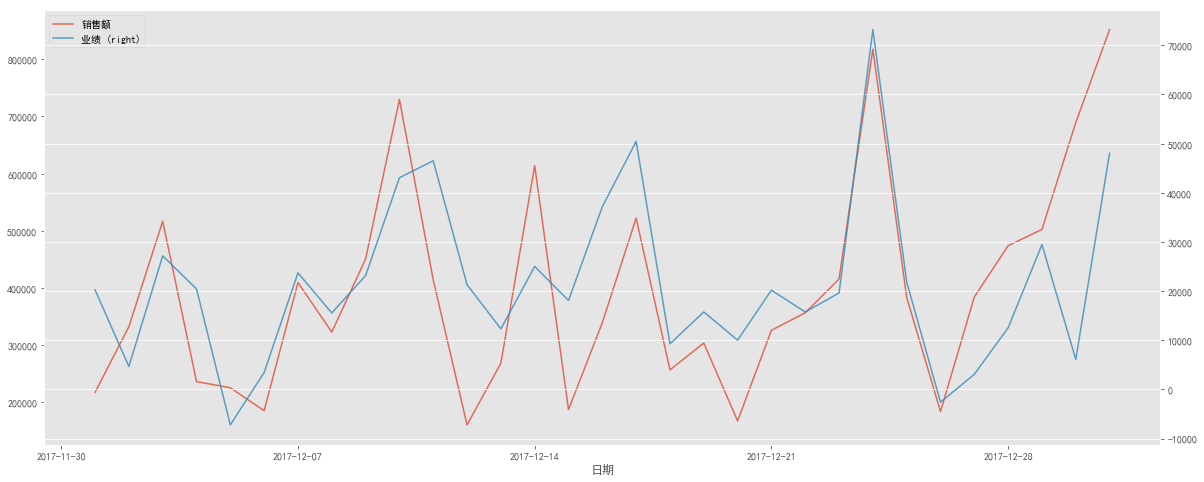

In [162]:
date_group.set_index('日期')[['销售额','业绩']].plot(figsize=(20,8),secondary_y=['业绩'],alpha=0.8)

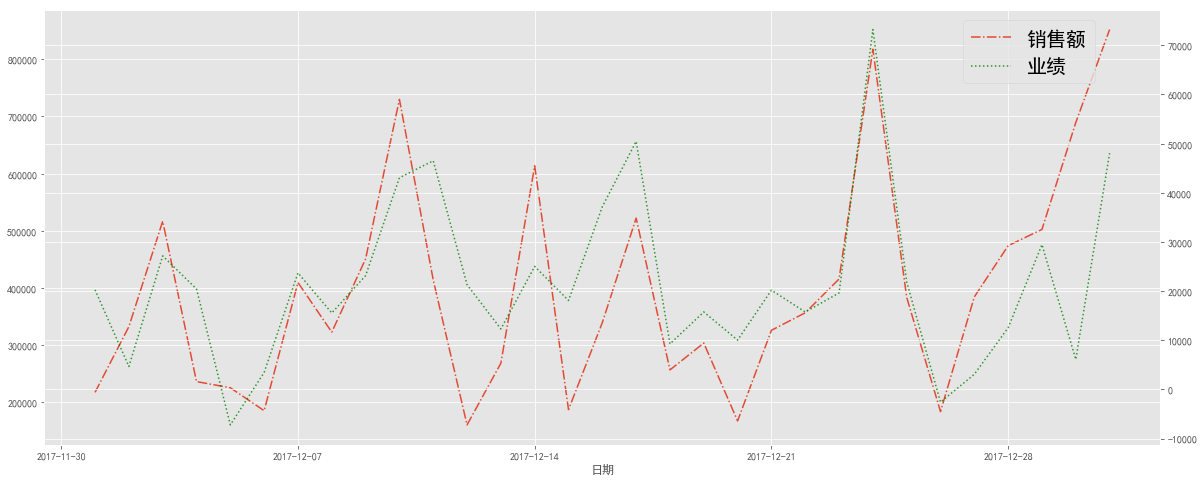

In [198]:
fig,ax=plt.subplots(1,1,figsize=(20,8))
ax2=ax.twinx()
date_group.set_index('日期')['销售额'].plot(kind='line',ax=ax,linestyle='-.',label='销售额')
date_group.set_index('日期')['业绩'].plot(ax=ax2,color='g',alpha=0.8,linestyle=':',label='业绩')
fig.legend(loc=1,fontsize=20,bbox_to_anchor=(0.95,1),bbox_transform=ax.transAxes)

In [ ]:
'''
    一级指标:销售额、业绩、订单数
    二级指标:用户数*转化率*单价、销售额-收房成本-装修成本-空置成本-运营成本
    三级指标:
        过程指标
        线上渠道(58、链家、贝壳)--(曝光/点击)-->详细页面-->电话邀约-->现场带看-->签订合同-->转介绍
    四级指标:
        分类指标
        地区:省 市 区 ... 店 组 ...
        渠道(客户来源):线上渠道 线下渠道 ...
        产品:整租合租 、 服务公寓品牌公寓
        付款方式:
'''

In [218]:
user_sh=user.query('城市=="上海市" and 业务区!="CC部"').copy()

In [219]:
user_sh['创建日期(Date)']=user_sh['创建时间'].dt.date

In [220]:
print("12月份上海市总获客数为:{}人".format(user_sh['客户编号'].count()))
print("12月份上海市总成交数为:{}人".format(order_sh['出租合同号'].count()))
print("12月份上海市成交转化率为:{:.2%}".format(order_sh['出租合同号'].count()/user_sh['客户编号'].count()))

12月份上海市总获客数为:4367人
12月份上海市总成交数为:501人
12月份上海市成交转化率为:11.47%


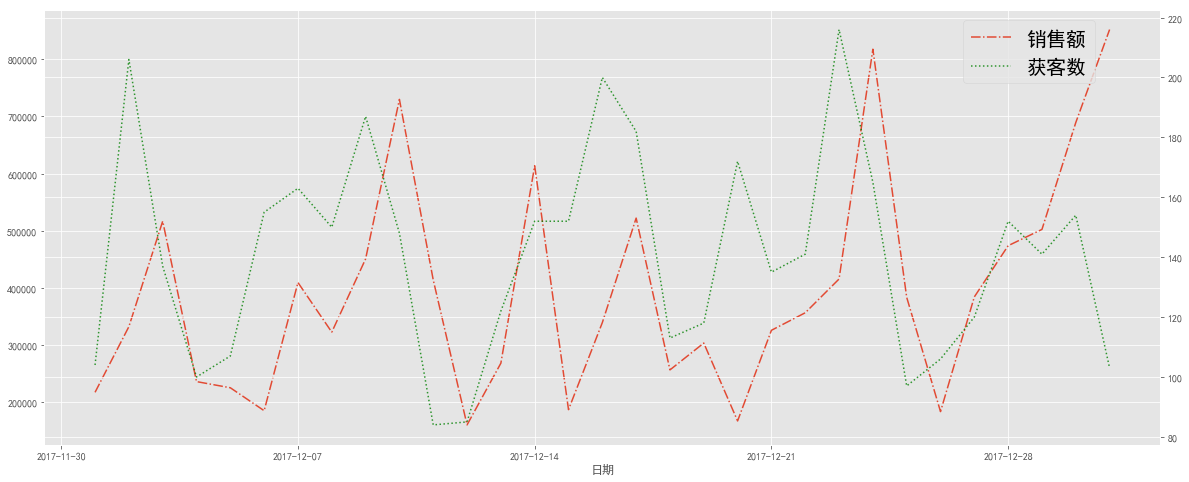

In [228]:
fig,ax=plt.subplots(1,1,figsize=(20,8))
ax2=ax.twinx()
date_group.set_index('日期')['销售额'].plot(kind='line',ax=ax,linestyle='-.',label='销售额')
user_sh.groupby('创建日期(Date)')['客户编号'].count().plot(ax=ax2,color='g',alpha=0.8,linestyle=':',label='获客数')
fig.legend(loc=1,fontsize=20,bbox_to_anchor=(0.95,1),bbox_transform=ax.transAxes)

In [245]:
user_count=user_sh['客户编号'].count()
user_visitor=(user_sh['是否带看']=="已带看").sum()
user_order=order_sh['出租合同号'].count()
print("12月份上海市总获客数为:{}人".format(user_count))
print("12月份上海市带看客户数为:{}人".format(user_visitor))
print("12月份上海市总成交数为:{}人".format(user_order))
print("12月份客户带看率:{:.2%}".format(user_visitor/user_count))
print("12月份成交转化率:{:.2%}".format(user_order/user_count))
print("12月份带看转化率:{:.2%}".format(user_order/user_visitor))
print("12月份带看成交比:{:.1f}".format(user_visitor/user_order))

12月份上海市总获客数为:4367人
12月份上海市带看客户数为:1994人
12月份上海市总成交数为:501人
12月份客户带看率:45.66%
12月份成交转化率:11.47%
12月份带看转化率:25.13%
12月份带看成交比:4.0


In [256]:
data=(user_sh.groupby('业务区').agg({'城市':'count','是否带看':lambda x:(x=="已带看").sum()}).rename(
    columns={'城市':'客户数','是否带看':'带看数'}))
data

,客户数,带看数
业务区,,
东区,174,46
中区,556,231
北区,430,233
华夏区,1037,381
南区,573,264
自贸区,362,231
西区,480,241
金桥区,325,193
金融区,283,99


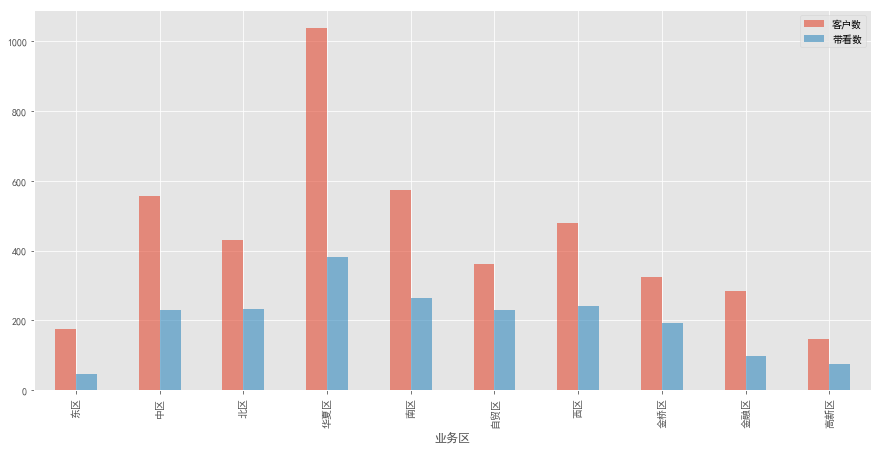

In [257]:
data.plot(kind='bar',figsize=(15,7),alpha=.6)

Text(0.5,1,'12月份获客的来源渠道')

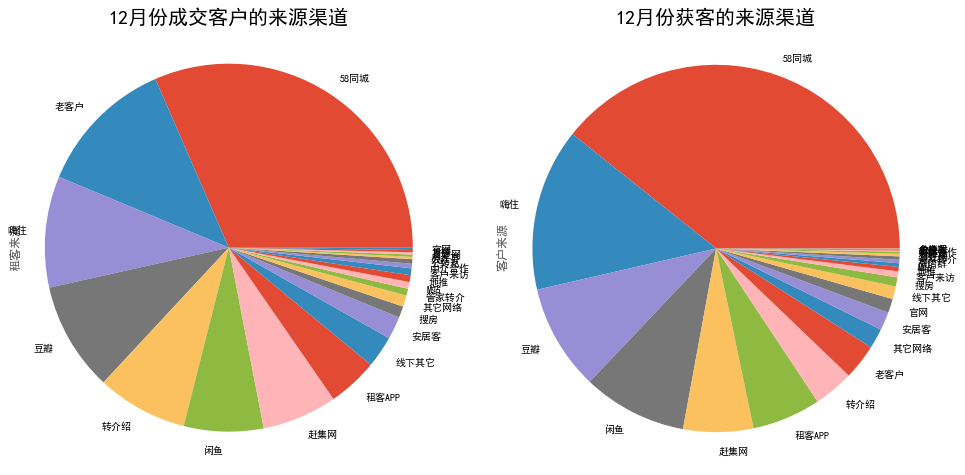

In [271]:
fig,ax=plt.subplots(1,2,figsize=(16,8))
order_sh['租客来源'].value_counts().plot(kind='pie',ax=ax[0])
ax[0].axis('equal')
ax[0].set_title('12月份成交客户的来源渠道',fontsize=20)

user_sh['客户来源'].value_counts().plot(kind='pie',ax=ax[1])
ax[1].axis('equal')
ax[1].set_title('12月份获客的来源渠道',fontsize=20)

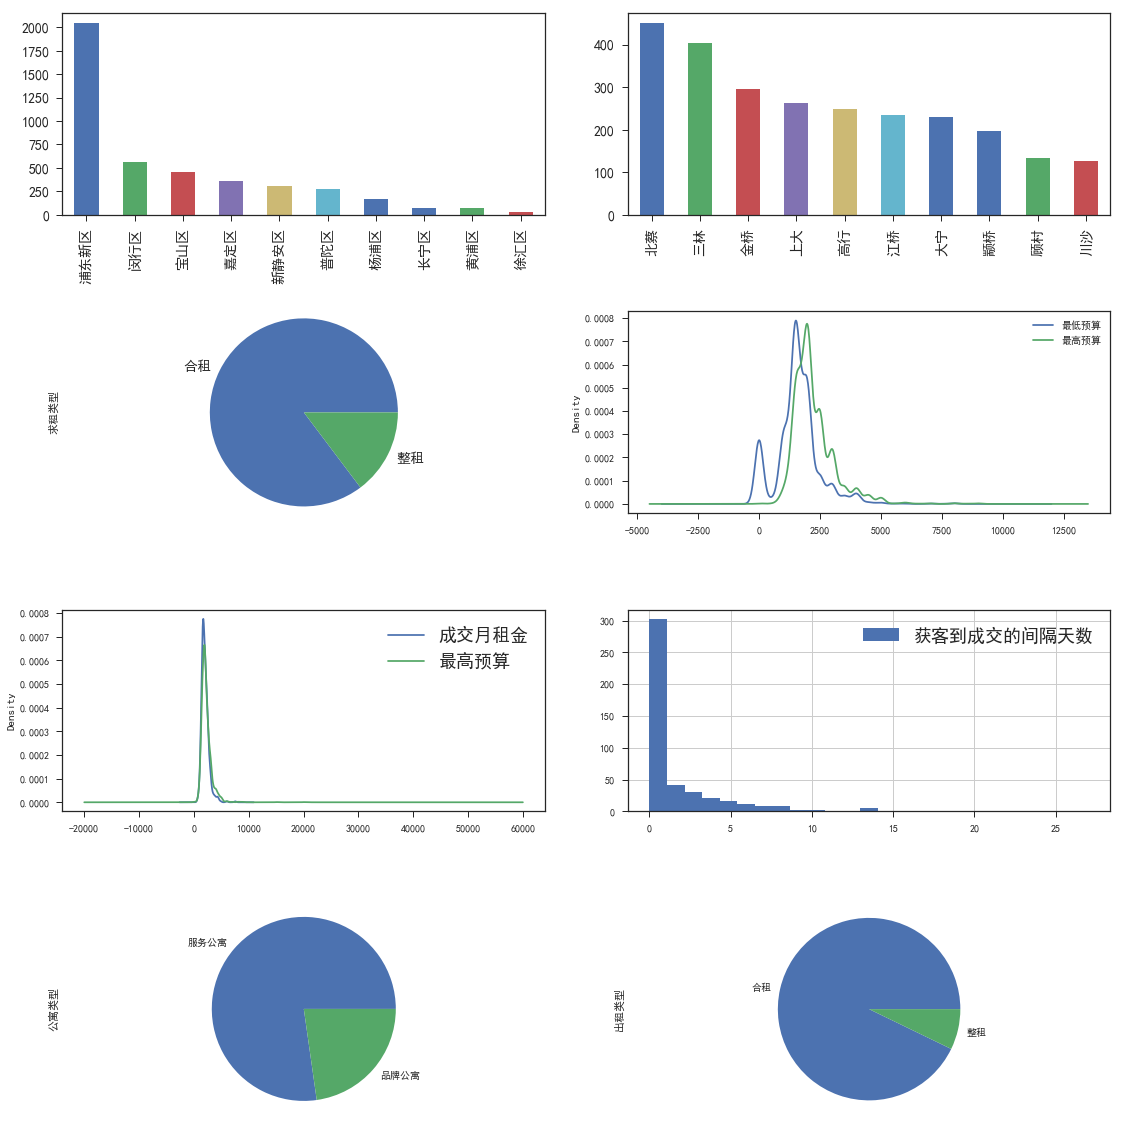

In [385]:
'''
    用户分析
'''
plt.figure(figsize=(16,16))

plt.subplot(4,2,1)
user_sh['求租城区'].value_counts().head(10).plot(
    kind='bar',fontsize=14)
plt.tight_layout()

plt.subplot(4,2,2)
pd.Series([j for i in user_sh['求租商圈'].dropna() for j in i.split(',')]).value_counts().head(10).plot(
    kind='bar',fontsize=14)
plt.tight_layout()

plt.subplot(4,2,3)
user_sh['求租类型'].dropna().value_counts().plot(
    kind='pie',fontsize=14)
plt.axis('equal')
plt.tight_layout()

ax4=plt.subplot(4,2,4)
user_sh['求租价格'].dropna().str.split('到',expand=True).astype(float).rename(
    columns={0:'最低预算',1:'最高预算'}
).query('最低预算<10000 and 最高预算<10000').plot(kind='kde',ax=ax4)
plt.tight_layout()

plt.subplot(4,2,5)
order_sh['出租合同首付月租金'].plot(kind='kde',label='成交月租金')
user_sh['求租价格'].dropna().str.split('到').str[-1].astype(float).plot(kind='kde',label='最高预算')
plt.legend(fontsize=18)
plt.tight_layout()

plt.subplot(4,2,6)
data=user_sh[(~user_sh['出租合同提交日期'].isna())].reset_index(drop=True).copy()
((data['出租合同提交日期'].astype('datetime64[ns]')-data['创建时间']).dt.days).hist(bins=25,label='获客到成交的间隔天数')
plt.legend(fontsize=18)
plt.tight_layout()

plt.subplot(4,2,7)
order_sh['公寓类型'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.tight_layout()

plt.subplot(4,2,8)
order_sh['出租类型'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.tight_layout()

In [455]:
payways=['58同城','赶集网','安居客','搜房','百姓网','嗨住']
area_user=user_sh.groupby('业务区').agg({'客户编号':'count','是否带看':lambda x:(x=='已带看').sum(),
                                     '客户来源':lambda x:(x.isin(payways)).sum()}).reset_index().rename(
    columns={'客户编号':'客户数','是否带看':'带看数','客户来源':'付费客户数'})
area_user=area_user.append(area_user.apply(lambda x:'上海市' if type(x[0])==str else x.sum()),ignore_index=True)
area_user

,业务区,客户数,带看数,付费客户数
0,东区,174,46,126
1,中区,556,231,322
2,北区,430,233,314
3,华夏区,1037,381,600
4,南区,573,264,409
5,自贸区,362,231,229
6,西区,480,241,289
7,金桥区,325,193,212
8,金融区,283,99,131
9,高新区,147,75,93


In [457]:
area_order=order_sh.assign(业绩copy=lambda x:x['业绩']).groupby('业务区').agg({'出租合同号':'count','出租合同首付月租金':lambda x:x.sum()*12,
                           '业绩':'sum','业绩copy':lambda x:(x<0).sum(),
                            '租客来源':lambda x:x.isin(payways).sum()}).rename(columns={
    '出租合同号':'成交数','出租合同首付月租金':'销售额','业绩copy':'亏损订单数','租客来源':'付费成交数'
}).reset_index()
area_order=area_order.append(area_order.apply(lambda x:'上海市' if type(x[0])==str else x.sum()),ignore_index=True)
area_order

,业务区,成交数,销售额,业绩,亏损订单数,付费成交数
0,东区,10,344832.00,19302.42,3.0,5
1,中区,54,1585500.00,23722.75,22.0,31
2,北区,68,1348710.00,164559.33,6.0,35
3,华夏区,91,2455632.00,182151.74,16.0,33
4,南区,57,1380069.96,76020.51,17.0,32
5,自贸区,48,1009464.00,54684.31,9.0,24
6,西区,66,1479178.56,54500.93,23.0,41
7,金桥区,56,1339968.00,23900.83,17.0,35
8,金融区,34,958608.00,48058.99,10.0,13
9,高新区,17,337440.00,20129.17,1.0,7


In [458]:
area_channel=channel.groupby('区').agg({'经纪人姓名':'nunique','费用':'sum'}).reset_index().rename(columns={
    '区':'业务区','经纪人姓名':'人数','费用':'广告投入'
})
area_channel=area_channel.append(area_channel.apply(lambda x:'上海市' if type(x[0])==str else x.sum()),ignore_index=True)
area_channel

,业务区,人数,广告投入
0,东区,8,6200
1,中区,22,18500
2,北区,22,23950
3,华夏区,41,36600
4,南区,21,18700
5,自贸区,19,15400
6,西区,25,22600
7,金桥区,13,10100
8,金融区,9,7250
9,高新区,6,6100


In [459]:
area_data=pd.merge(pd.merge(area_user,area_order),area_channel)
area_data

,业务区,客户数,带看数,付费客户数,成交数,销售额,业绩,亏损订单数,付费成交数,人数,广告投入
0,东区,174,46,126,10,344832.00,19302.42,3.0,5,8,6200
1,中区,556,231,322,54,1585500.00,23722.75,22.0,31,22,18500
2,北区,430,233,314,68,1348710.00,164559.33,6.0,35,22,23950
3,华夏区,1037,381,600,91,2455632.00,182151.74,16.0,33,41,36600
4,南区,573,264,409,57,1380069.96,76020.51,17.0,32,21,18700
5,自贸区,362,231,229,48,1009464.00,54684.31,9.0,24,19,15400
6,西区,480,241,289,66,1479178.56,54500.93,23.0,41,25,22600
7,金桥区,325,193,212,56,1339968.00,23900.83,17.0,35,13,10100
8,金融区,283,99,131,34,958608.00,48058.99,10.0,13,9,7250
9,高新区,147,75,93,17,337440.00,20129.17,1.0,7,6,6100


In [460]:
df1=(area_data.assign(人均客户=lambda x:x['客户数']/x['人数'],
                  人均成交=lambda x:x['成交数']/x['人数'],
                  人均业绩=lambda x:x['业绩']/x['人数'],
                  亏损率=lambda x:x['亏损订单数']/x['成交数'])
    .reindex(columns=['业务区','人数','客户数','人均客户','成交数','人均成交','业绩','人均业绩','销售额','亏损率']))
df1

,业务区,人数,客户数,人均客户,成交数,人均成交,业绩,人均业绩,销售额,亏损率
0,东区,8,174,21.750000,10,1.250000,19302.42,2412.802500,344832.00,0.300000
1,中区,22,556,25.272727,54,2.454545,23722.75,1078.306818,1585500.00,0.407407
2,北区,22,430,19.545455,68,3.090909,164559.33,7479.969545,1348710.00,0.088235
3,华夏区,41,1037,25.292683,91,2.219512,182151.74,4442.725366,2455632.00,0.175824
4,南区,21,573,27.285714,57,2.714286,76020.51,3620.024286,1380069.96,0.298246
5,自贸区,19,362,19.052632,48,2.526316,54684.31,2878.121579,1009464.00,0.187500
6,西区,25,480,19.200000,66,2.640000,54500.93,2180.037200,1479178.56,0.348485
7,金桥区,13,325,25.000000,56,4.307692,23900.83,1838.525385,1339968.00,0.303571
8,金融区,9,283,31.444444,34,3.777778,48058.99,5339.887778,958608.00,0.294118
9,高新区,6,147,24.500000,17,2.833333,20129.17,3354.861667,337440.00,0.058824


In [446]:
df1.applymap(lambda x:x if type(x)==int or type(x)==str else round(x,2))

,业务区,人数,客户数,人均客户,成交数,人均成交,业绩,人均业绩,销售额,亏损率
0,东区,8,174,21.75,10,1.25,19302.42,2412.80,344832.00,0.30
1,中区,22,556,25.27,54,2.45,23722.75,1078.31,1585500.00,0.41
2,北区,22,430,19.55,68,3.09,164559.33,7479.97,1348710.00,0.09
3,华夏区,41,1037,25.29,91,2.22,182151.74,4442.73,2455632.00,0.18
4,南区,21,573,27.29,57,2.71,76020.51,3620.02,1380069.96,0.30
5,自贸区,19,362,19.05,48,2.53,54684.31,2878.12,1009464.00,0.19
6,西区,25,480,19.20,66,2.64,54500.93,2180.04,1479178.56,0.35
7,金桥区,13,325,25.00,56,4.31,23900.83,1838.53,1339968.00,0.30
8,金融区,9,283,31.44,34,3.78,48058.99,5339.89,958608.00,0.29
9,高新区,6,147,24.50,17,2.83,20129.17,3354.86,337440.00,0.06


In [468]:
df2=area_data.assign(带看率=lambda x:x['带看数']/x['客户数'],
                 带看成交比=lambda x:x['带看数']/x['成交数'],
                 成交转化率=lambda x:x['成交数']/x['客户数'],
                 获客成本=lambda x:x['广告投入']/x['付费客户数'],
                 成交成本=lambda x:x['广告投入']/x['付费成交数']).reindex(
    columns=['业务区','客户数','带看数','带看率','成交数','成交转化率','带看成交比','付费客户数','获客成本',
            '付费成交数','成交成本'])
df2

,业务区,客户数,带看数,带看率,成交数,成交转化率,带看成交比,付费客户数,获客成本,付费成交数,成交成本
0,东区,174,46,0.264368,10,0.057471,4.600000,126,49.206349,5,1240.000000
1,中区,556,231,0.415468,54,0.097122,4.277778,322,57.453416,31,596.774194
2,北区,430,233,0.541860,68,0.158140,3.426471,314,76.273885,35,684.285714
3,华夏区,1037,381,0.367406,91,0.087753,4.186813,600,61.000000,33,1109.090909
4,南区,573,264,0.460733,57,0.099476,4.631579,409,45.721271,32,584.375000
5,自贸区,362,231,0.638122,48,0.132597,4.812500,229,67.248908,24,641.666667
6,西区,480,241,0.502083,66,0.137500,3.651515,289,78.200692,41,551.219512
7,金桥区,325,193,0.593846,56,0.172308,3.446429,212,47.641509,35,288.571429
8,金融区,283,99,0.349823,34,0.120141,2.911765,131,55.343511,13,557.692308
9,高新区,147,75,0.510204,17,0.115646,4.411765,93,65.591398,7,871.428571


In [483]:
ch_user=user_sh.groupby('客户来源').agg({'客户编号':'count','是否带看':lambda x:(x=='已带看').sum()}).reset_index().rename(
    columns={'客户编号':'客户数','是否带看':'带看数','客户来源':'渠道'}).sort_values('客户数',ascending=False).reset_index(drop=True)
ch_user

,渠道,客户数,带看数
0,58同城,1716,732
1,嗨住,625,276
2,豆瓣,407,254
3,闲鱼,401,197
4,赶集网,269,106
5,租客APP,264,63
6,转介绍,154,103
7,老客户,136,103
8,其它网络,77,32
9,安居客,70,30


In [492]:
ch_order=order_sh.groupby('租客来源').agg({'出租合同号':'count','出租合同首付月租金':lambda x:x.sum()*12}).sort_values('出租合同号',ascending=False
    ).reset_index().rename(columns={
    '租客来源':'渠道','出租合同号':'成交数','出租合同首付月租金':'销售额'
})

In [504]:
ch_channel=(channel.groupby('端口').agg({'费用':'sum','经纪人姓名':'nunique'}).sort_values('费用',ascending=False).reset_index()
            .rename(columns={'端口':'渠道','费用':'广告投入','经纪人姓名':'人数'}))
ch_channel

,渠道,广告投入,人数
0,58同城,108000,133
1,嗨住,29600,74
2,赶集网,18400,42
3,安居客,7000,35
4,搜房,1800,9
5,百姓网,600,3


In [507]:
ch_data=pd.merge(pd.merge(ch_user,ch_order,how='outer'),ch_channel,how='outer')
ch_data

,渠道,客户数,带看数,成交数,销售额,广告投入,人数
0,58同城,1716,732,158.0,3754628.40,108000.0,133.0
1,嗨住,625,276,49.0,1276272.00,29600.0,74.0
2,豆瓣,407,254,48.0,1247421.96,NaN,NaN
3,闲鱼,401,197,35.0,829884.00,NaN,NaN
4,赶集网,269,106,33.0,739060.56,18400.0,42.0
5,租客APP,264,63,22.0,527400.00,NaN,NaN
6,转介绍,154,103,40.0,1006737.60,NaN,NaN
7,老客户,136,103,61.0,1500600.00,NaN,NaN
8,其它网络,77,32,5.0,143040.00,NaN,NaN
9,安居客,70,30,10.0,201264.00,7000.0,35.0


In [530]:
df3=ch_data.dropna().assign(获客成本=lambda x:round(x['广告投入']/x['客户数']),
                        成交成本=lambda x:round(x['广告投入']/x['成交数']),
                        销售投入比=lambda x:round(x['销售额']/x['广告投入'],1),
                        人均获客=lambda x:round(x['客户数']/x['人数'],1),
                        人均成交=lambda x:round(x['成交数']/x['人数'],2),
                        人均投入=lambda x:round(x['广告投入']/x['人数'])).reindex(
    columns=['渠道','广告投入','客户数','获客成本','成交数','成交成本','销售投入比','人均获客','人均成交','人均投入']).astype(
    {'广告投入':int,'成交成本':int,'人均投入':int}
)
df3

,渠道,广告投入,客户数,获客成本,成交数,成交成本,销售投入比,人均获客,人均成交,人均投入
0,58同城,108000,1716,63.0,158.0,684,34.8,12.9,1.19,812
1,嗨住,29600,625,47.0,49.0,604,43.1,8.4,0.66,400
4,赶集网,18400,269,68.0,33.0,558,40.2,6.4,0.79,438
9,安居客,7000,70,100.0,10.0,700,28.8,2.0,0.29,200
12,搜房,1800,35,51.0,5.0,360,58.5,3.9,0.56,200
18,百姓网,600,10,60.0,1.0,600,41.0,3.3,0.33,200


In [538]:
df4=ch_data.assign(带看率=lambda x:(x['带看数']/x['客户数']),
                   成交转化率=lambda x:x['成交数']/x['客户数'],
                   带看成交比=lambda x:x['带看数']/x['成交数']).reindex(
    columns=['渠道','客户数','带看数','带看率','成交数','成交转化率','带看成交比']
)
df4

,渠道,客户数,带看数,带看率,成交数,成交转化率,带看成交比
0,58同城,1716,732,0.426573,158.0,0.092075,4.632911
1,嗨住,625,276,0.441600,49.0,0.078400,5.632653
2,豆瓣,407,254,0.624079,48.0,0.117936,5.291667
3,闲鱼,401,197,0.491272,35.0,0.087282,5.628571
4,赶集网,269,106,0.394052,33.0,0.122677,3.212121
5,租客APP,264,63,0.238636,22.0,0.083333,2.863636
6,转介绍,154,103,0.668831,40.0,0.259740,2.575000
7,老客户,136,103,0.757353,61.0,0.448529,1.688525
8,其它网络,77,32,0.415584,5.0,0.064935,6.400000
9,安居客,70,30,0.428571,10.0,0.142857,3.000000


In [541]:
with pd.ExcelWriter('./data/报表.xlsx') as writer:
    df1.to_excel(writer,index=False,sheet_name='区域业务表')
    df2.to_excel(writer,index=False,sheet_name='漏斗分析表')
    df3.to_excel(writer,index=False,sheet_name='渠道分析表')
    df4.to_excel(writer,index=False,sheet_name='渠道分析表',startrow=10,na_rep='<NA>')